In [114]:
from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point
import pandas as pd

In [115]:
def arr_uniform(num):
    return uniform.rvs(size = num)

In [116]:
y = arr_uniform(100)
x = np.linspace(0, 10, 100)

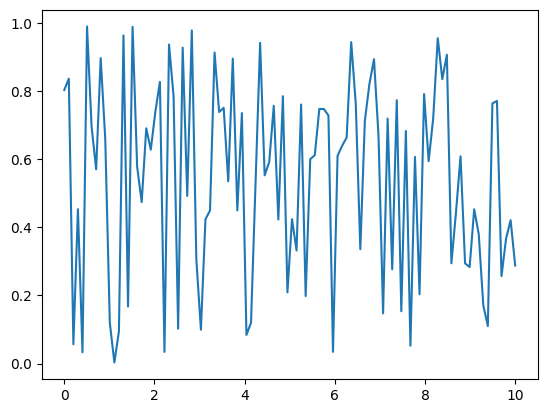

In [117]:
plt.plot(x, y)

In [118]:
def curve(z):
    Z = np.exp(0.01 * z) + 4 * (z) ** 2
    F = np.exp(0.1 * z) + 4 * (z-10) ** 2
    return -(F + Z)

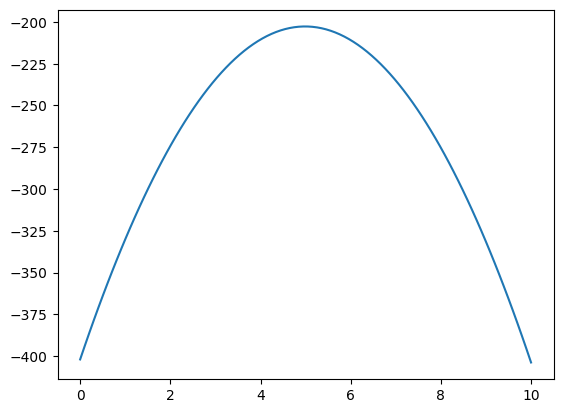

In [119]:
exp_graph = curve(uniform.rvs(size=100))
plt.plot(x, curve(x))

In [120]:
poly = Polygon([(0, -400), (0,-200), (10,-200), (10,-400)])
min_x, min_y, max_x, max_y = poly.bounds

In [121]:
def random_in_poly(polygon, size):
    min_X, min_Y, max_X, max_Y = poly.bounds
    points = []
    while len(points) < size:
        rand_point = Point(np.random.uniform(min_X, max_X), np.random.uniform(min_Y, max_Y))
        points.append(rand_point)
    return points

In [122]:
points = random_in_poly(poly, size= 1000)

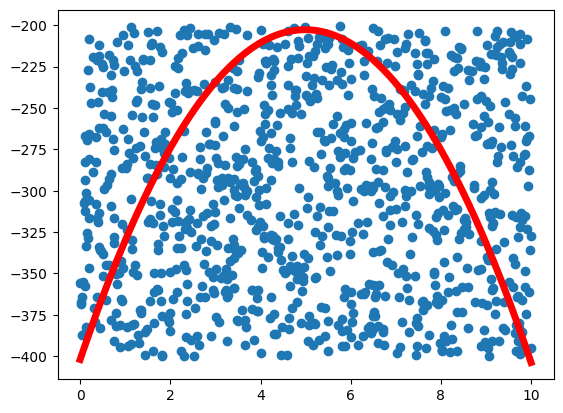

In [123]:
xx = [point.x for point in points]
yy = [point.y for point in points]
plt.scatter(xx, yy)
# Нанесем график, который получили до этого
plt.plot(x, curve(x), color='red', linewidth=5)

(array([ 1.,  1.,  1.,  1.,  4.,  6.,  3.,  2.,  5.,  4.,  4.,  2.,  4.,
         6.,  5.,  8.,  2.,  7.,  5.,  7.,  7., 10.,  4.,  5.,  9.,  6.,
         6.,  9., 11.,  5., 11.,  8., 14., 13.,  7.,  9.,  5.,  8., 12.,
        13.,  9., 17.,  9.,  6.,  3., 14.,  8., 11.,  7., 10.,  5., 14.,
         8., 11., 12.,  6.,  9., 10., 11., 12.,  6.,  3.,  6.,  8.,  9.,
        11., 10.,  9.,  8.,  5.,  7.,  7.,  8.,  5.,  4.,  9.,  5.,  5.,
         6.,  8.,  8.,  9.,  4.,  5.,  7.,  4.,  6.,  3.,  1.,  1.,  5.,
         5.,  5.,  3.,  1.,  3.,  0.,  0.,  4.,  5.]),
 array([0.32890281, 0.42370367, 0.51850454, 0.6133054 , 0.70810627,
        0.80290713, 0.897708  , 0.99250886, 1.08730972, 1.18211059,
        1.27691145, 1.37171232, 1.46651318, 1.56131404, 1.65611491,
        1.75091577, 1.84571664, 1.9405175 , 2.03531836, 2.13011923,
        2.22492009, 2.31972096, 2.41452182, 2.50932268, 2.60412355,
        2.69892441, 2.79372528, 2.88852614, 2.983327  , 3.07812787,
        3.17292873, 3.2677

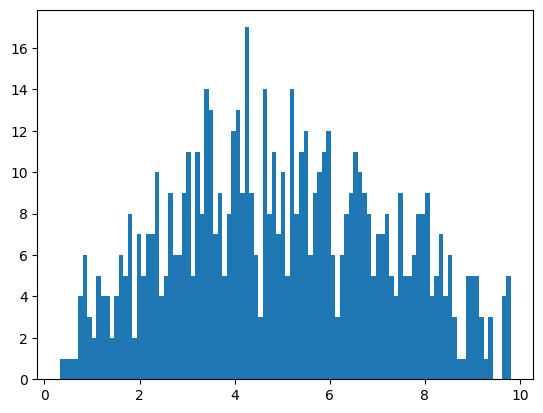

In [129]:
## внесли точки в дата-фрейм
data_frame = pd.DataFrame({'xx':xx,'yy':yy}, index = None)
useful_points = []
## оставляем точки, которые удовлетворяют условию y > curve(x)
for i in range(len(data_frame)):
    if data_frame.loc[i, 'yy'] < curve(data_frame.loc[i,'xx']):
        useful_points.append([data_frame.loc[i,'xx']])

under = np.asarray(useful_points)
plt.hist(under, bins = 100)